## **IMAGE CLASSIFIER WITHOUT CNN**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('mnist_test.csv') 

In [3]:
X = df.drop('label', axis=1) 
y = df['label']  

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.952


In [9]:
y_probs = model.predict_proba(X_test)
y_pred_labels = np.argmax(y_probs, axis=1)
confidences = np.max(y_probs, axis=1)

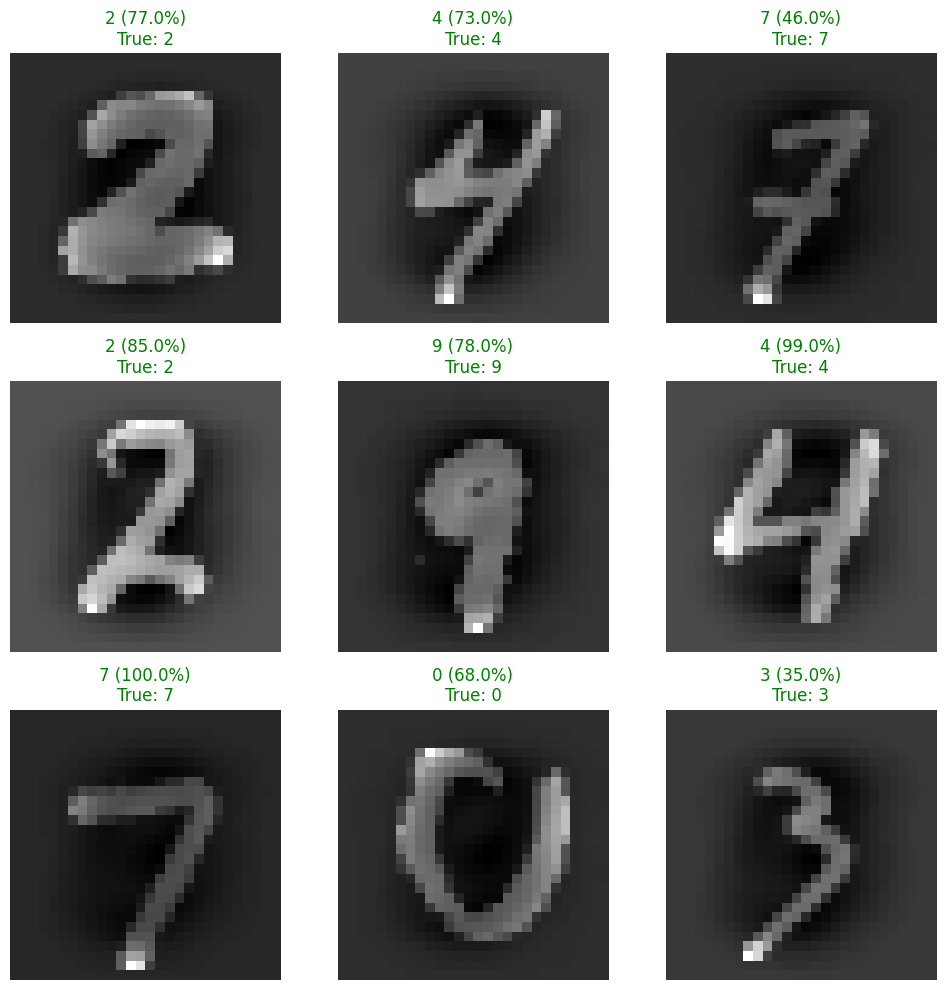

In [10]:
indices = np.random.choice(len(X_test), 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    image = X_test[idx].reshape(28, 28)
    true_label = y_test.iloc[idx]
    pred_label = y_pred_labels[idx]
    confidence = confidences[idx] * 100

    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"{pred_label} ({confidence:.1f}%)\nTrue: {true_label}", color=color)

plt.tight_layout()
plt.show()